In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
%matplotlib inline

stop_words = set(stopwords.words('english'))
pd.set_option("max_colwidth", 300)

# Data Preparations

In [2]:
# load the data
df = pd.read_csv('Hotel_Reviews.csv')

# keep only the reviews that are greater than or equal to 8.5 
# or less than or equal to 6.5
df = df.loc[(df.Reviewer_Score>=8.5) | (df.Reviewer_Score<=6.5)].copy()

# create a function for the label

def review_label(x):
    if x>=8.5:
        return 1
    else:
        return 0
    

# create the label column    
df['label'] = df['Reviewer_Score'].apply(lambda x: review_label(x))


# replace the 'No Positive' and the 'No Negative' 
# from the corresponding columns with an empty string

df['Positive_Review'].replace('^No Positive$', '', inplace=True, regex=True)
df['Negative_Review'].replace('^No Negative$', '', inplace=True, regex=True)

# concatenate the Positive and Negative Review columns into 'Reviews'
df['reviews'] = df['Negative_Review'] + df['Positive_Review']

# remove the empty reviews
df = df.loc[df['reviews'].apply(lambda x:len(x.split()))>0]
df = df[['reviews', 'label']].copy()
df.reset_index(drop = True, inplace = True)
df.head(10)

,reviews,label
0,I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd...,0
1,My room was dirty and I was afraid to walk barefoot on the floor which looked as if it was not cleaned in weeks White furniture which looked nice in pictures was dirty too and the door looked like it was attacked by an angry dog My shower drain was clogged and the staff did not respond to my re...,0
2,Cleaner did not change our sheet and duvet everyday but just made bed They also didn t clean the floor and changed the body gel when we run out of it The room is spacious and bright The hotel is located in a quiet and beautiful park,0
3,Apart from the price for the brekfast Everything very good Good location Set in a lovely park friendly staff Food high quality We Oth enjoyed the breakfast,1
4,Even though the pictures show very clean rooms the actual room was quit dirty and outlived Also check in is at 15 o clock but our room was not ready at that time,0
5,Nothing all great Rooms were stunningly decorated and really spacious in the top of the building Pictures are of room 300 The true beauty of the building has been kept but modernised brilliantly Also the bath was lovely and big and inviting Great more for couples Restaurant menu was a bit pric...,1
6,6 30 AM started big noise workers loading wood down the windows Stupid room numbering system it took 20 Minutes with a night guard finally to find our rooms The check in staff pointed us in the wrong direction No late dinner bar closes at 1 am Ugly view on trash lorry from windows No informatio...,0
7,The floor in my room was filfy dirty Very basic rooms I had a 20yr old tv in my room Fridge did not work Overpriced breakfast Comfy bed good location,0
8,This hotel is being renovated with great care and with an appreciation for its unique structure and location My spacious and comfortable room had a large double paned glass window onto the lush greenery of the park The breakfast selection was spectacular All considered this was a great hotel fo...,1
9,The staff in the restaurant could of been more pleasant we only visited once but that wouldn t stop us from booking again it might of just been an off night for him It was very good very historic building that s why I chose it,1


<AxesSubplot:>

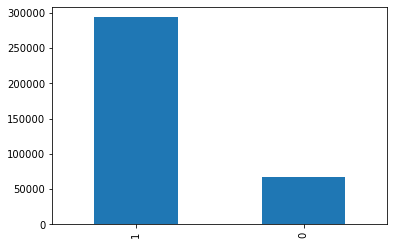

In [3]:
df.label.value_counts().plot(kind='bar')

In [4]:
df.label.value_counts(normalize=True)

1    0.812076
0    0.187924
Name: label, dtype: float64

In [5]:
# undersample the data

df_grouped_by = df.groupby(['label'])
 
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
 
df_balanced = df_balanced.droplevel(['label'])

# shuffle the data frame
df = df_balanced.sample(frac=1, random_state=1).reset_index(drop=True)
df.head(10) 

,reviews,label
0,the wi fi was a little slow but you cant expect any better from free things everything was excellent the money was good compared to other hotels in London Really loved the rooms n the bed was big enough,1
1,The room survace is poor,0
2,Hotel going through major refurbishment which I wasn t made aware of when booking Very noisy drilling etc started before 9 am on a Sunday Location,0
3,Room was too small Not enough space to move around It would be ok if the hotel was not advertised as a 4 star hotel It is in no way a 4 star hotel 3 at the most bed was nice very comfy Staff were nice,0
4,Only two seats at the reception area There are 2 lifts and one of them was out of order for whole duration of our stay 4 days Reception staff look like not happy to see you Poor breakfast buffet not as expected from a 5 star hotel Ceiling decoration within the room was peeled off Strange room a...,0
5,Kettle in room would be a plus Very good breakfast and restaurants in hotel are fantastic,1
6,Nothing Great location Clean easy to find,1
7,Great location at a great price,1
8,not enough irons in the hotel,1
9,the room is very small and uncomfortable the location,0


In [6]:
df

,reviews,label
0,the wi fi was a little slow but you cant expect any better from free things everything was excellent the money was good compared to other hotels in London Really loved the rooms n the bed was big enough,1
1,The room survace is poor,0
2,Hotel going through major refurbishment which I wasn t made aware of when booking Very noisy drilling etc started before 9 am on a Sunday Location,0
3,Room was too small Not enough space to move around It would be ok if the hotel was not advertised as a 4 star hotel It is in no way a 4 star hotel 3 at the most bed was nice very comfy Staff were nice,0
4,Only two seats at the reception area There are 2 lifts and one of them was out of order for whole duration of our stay 4 days Reception staff look like not happy to see you Poor breakfast buffet not as expected from a 5 star hotel Ceiling decoration within the room was peeled off Strange room a...,0
...,...,...
135993,There could have been a little soundproofing between the toilet and the room as there where none what so ever The staff could be better at informing as we had to ask for the cava and breakfast in the room ourselfes before we got any info it was part of our booking The room was very nice The be...,1
135994,Great location Large rooms Friendly staff Good breakfast The area is very busy and noisy but we were on the 4th floor and heard no noise at all inside the room,1
135995,Charged for early check in Location very far from down town No bagage service,0
135996,Entire experience was a nightmare from start to finish and we were on our honeymoon Upon check in we were informed we had to pay an additional 30 per person per night because booking com did not transmit the info properly I can t hold that against the hotel but will address this with booking co...,0


In [7]:
df.label.value_counts()

1    67999
0    67999
Name: label, dtype: int64

In [8]:
# create the train and test datasets
train = df.sample(frac=0.75, random_state=1)
test = df.drop(train.index)

# EDA

In [9]:
df['NumberOfTokens'] = pd.DataFrame(df['reviews'].apply(lambda x: len(x.split())))
print(df.groupby('label')['NumberOfTokens'].describe())

         count       mean        std  min   25%   50%   75%    max
label                                                             
0      67999.0  48.285813  54.286102  1.0  14.0  31.0  61.0  689.0
1      67999.0  29.641524  32.389869  1.0  10.0  20.0  38.0  605.0


In [10]:
positive  = df.loc[df.label==1]['reviews'].str.lower().values.tolist()
negative  = df.loc[df.label==0]['reviews'].str.lower().values.tolist()

In [11]:
# Get the Positive Freq
Positive_freq = Counter(" ".join(positive).split())
        
    
# Get the Negatuve Freq
Negative_freq = Counter(" ".join(negative).split())

In [12]:
Positive_freq.most_common(50)

[('the', 120641),
 ('and', 82594),
 ('was', 54066),
 ('a', 47014),
 ('to', 46672),
 ('very', 36309),
 ('staff', 34211),
 ('room', 32902),
 ('in', 31243),
 ('of', 26397),
 ('hotel', 25744),
 ('location', 25704),
 ('for', 22977),
 ('is', 21592),
 ('we', 19613),
 ('were', 19043),
 ('great', 18916),
 ('i', 18673),
 ('it', 17941),
 ('breakfast', 17796),
 ('good', 15442),
 ('with', 15087),
 ('friendly', 14357),
 ('helpful', 13115),
 ('but', 12328),
 ('excellent', 11420),
 ('not', 11382),
 ('on', 10790),
 ('nice', 10544),
 ('clean', 10465),
 ('at', 10464),
 ('comfortable', 10150),
 ('from', 10089),
 ('bed', 9035),
 ('t', 8822),
 ('had', 8810),
 ('all', 8714),
 ('rooms', 8531),
 ('you', 8499),
 ('our', 8452),
 ('have', 8406),
 ('nothing', 8202),
 ('that', 7790),
 ('so', 7770),
 ('this', 7706),
 ('stay', 7619),
 ('as', 7582),
 ('are', 7216),
 ('there', 7133),
 ('everything', 6822)]

In [13]:
Negative_freq.most_common(50)

[('the', 199042),
 ('and', 99178),
 ('was', 90693),
 ('to', 83736),
 ('a', 69438),
 ('room', 66918),
 ('in', 57849),
 ('i', 48921),
 ('not', 46289),
 ('of', 42112),
 ('for', 41451),
 ('very', 36284),
 ('it', 35130),
 ('hotel', 35105),
 ('we', 34474),
 ('is', 32976),
 ('staff', 26256),
 ('location', 25922),
 ('were', 25140),
 ('no', 23935),
 ('on', 23274),
 ('t', 22001),
 ('at', 21569),
 ('had', 21522),
 ('that', 20128),
 ('with', 19573),
 ('they', 19440),
 ('breakfast', 17996),
 ('but', 17818),
 ('this', 16650),
 ('good', 16354),
 ('my', 15995),
 ('as', 14974),
 ('have', 14703),
 ('there', 14631),
 ('small', 14578),
 ('you', 14437),
 ('bed', 14058),
 ('from', 14049),
 ('rooms', 13963),
 ('so', 12959),
 ('be', 11744),
 ('when', 11684),
 ('our', 11386),
 ('are', 11331),
 ('all', 11266),
 ('one', 9802),
 ('bathroom', 9191),
 ('out', 9154),
 ('which', 8862)]

In [14]:
cnt = 0
for k,v in Positive_freq.most_common():
    if k not in stop_words:
        print ((k,v))
        cnt += 1
        if cnt>25:
            break

('staff', 34211)
('room', 32902)
('hotel', 25744)
('location', 25704)
('great', 18916)
('breakfast', 17796)
('good', 15442)
('friendly', 14357)
('helpful', 13115)
('excellent', 11420)
('nice', 10544)
('clean', 10465)
('comfortable', 10150)
('bed', 9035)
('rooms', 8531)
('nothing', 8202)
('stay', 7619)
('everything', 6822)
('would', 6758)
('lovely', 6682)
('really', 6294)
('service', 5818)
('perfect', 5351)
('small', 5060)
('bar', 4897)
('could', 4814)


In [15]:
cnt = 0
for k,v in Negative_freq.most_common():
    if k not in stop_words:
        print ((k,v))
        cnt += 1
        if cnt>25:
            break

('room', 66918)
('hotel', 35105)
('staff', 26256)
('location', 25922)
('breakfast', 17996)
('good', 16354)
('small', 14578)
('bed', 14058)
('rooms', 13963)
('one', 9802)
('bathroom', 9191)
('night', 8740)
('reception', 8159)
('us', 8136)
('service', 7981)
('like', 7945)
('would', 7784)
('poor', 7422)
('clean', 7333)
('nice', 7284)
('could', 7000)
('shower', 6964)
('stay', 6897)
('even', 6809)
('get', 6568)
('also', 6022)


In [16]:
pos_neg_ratios = Counter()
 
for term,cnt in Positive_freq.most_common():
    if(cnt > 100):
        pos_neg_ratio = Positive_freq[term] / float(Negative_freq[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

In [17]:
pos_neg_ratios.most_common(25)

[('gem', 19.833333333333332),
 ('spotlessly', 17.75),
 ('amazingly', 14.833333333333334),
 ('immaculate', 14.5),
 ('loved', 13.56060606060606),
 ('downside', 12.75),
 ('wonderful', 11.222222222222221),
 ('fabulous', 11.091954022988507),
 ('impeccable', 10.636363636363637),
 ('dislike', 10.5),
 ('notch', 10.090909090909092),
 ('superb', 10.024590163934427),
 ('spotless', 9.875),
 ('gorgeous', 9.45),
 ('beautifully', 9.047619047619047),
 ('amazing', 8.692156862745097),
 ('outstanding', 8.672727272727272),
 ('delicious', 8.660194174757281),
 ('exceptional', 8.622641509433961),
 ('fantastic', 8.246153846153845),
 ('favourite', 8.23076923076923),
 ('fab', 8.196078431372548),
 ('memorable', 7.923076923076923),
 ('classy', 7.2105263157894735),
 ('stunning', 7.162790697674419)]

In [18]:
neg_pos_ratios = Counter()
 
for term,cnt in Negative_freq.most_common():
    if(cnt > 100):
        neg_pos_ratio = Negative_freq[term] / float(Positive_freq[term]+1)
        neg_pos_ratios[term] = neg_pos_ratio

In [19]:
neg_pos_ratios.most_common(25)

[('unclean', 97.5),
 ('filthy', 90.0),
 ('incompetent', 53.5),
 ('indifferent', 51.0),
 ('bugs', 44.5),
 ('worst', 39.45),
 ('miserable', 38.2),
 ('unhelpful', 38.0),
 ('pathetic', 37.666666666666664),
 ('dirty', 35.36585365853659),
 ('disgusting', 34.625),
 ('unfriendly', 33.52),
 ('impolite', 32.5),
 ('supposedly', 30.0),
 ('arrogant', 27.25),
 ('replied', 27.0),
 ('blood', 26.6),
 ('rude', 26.168),
 ('stank', 25.75),
 ('appalling', 25.363636363636363),
 ('dingy', 25.333333333333332),
 ('disgrace', 24.2),
 ('depressing', 23.142857142857142),
 ('smelly', 22.954545454545453),
 ('dirt', 22.555555555555557)]

# Word Clouds

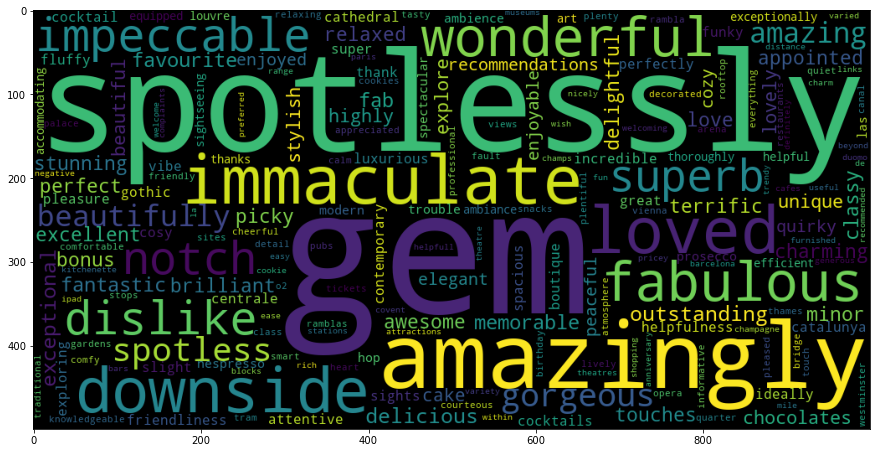

In [20]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(pos_neg_ratios)
 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

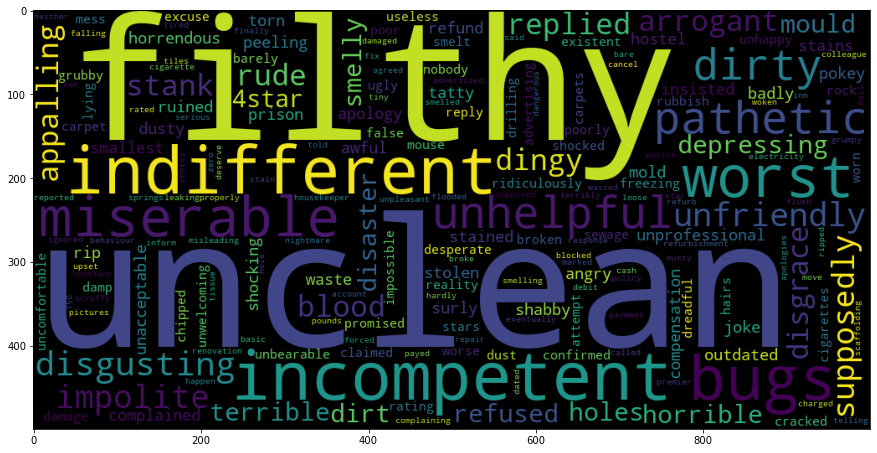

In [21]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(neg_pos_ratios)
 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# Logistic Regression

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [32]:
vect = TfidfVectorizer(ngram_range=(1,1), lowercase=True, stop_words='english', min_df = 5).fit(train['reviews'])

# we transform the train dataset
X_train_vectorized = vect.transform(train['reviews'])

# Train the Logistic Regression Model with regularization in order to penalize the features that don't perform well.
clf = LogisticRegression(C=5, solver='lbfgs', max_iter=1000)
clf.fit(X_train_vectorized, train['label'])

# transform the test text
X_test_vectorized = vect.transform(test['reviews'])

# Score the test dataset
y_test_predicted = clf.predict(X_test_vectorized)


# Score the train dataset
y_train_predicted = clf.predict(X_train_vectorized)

In [34]:
print(classification_report(train['label'], y_train_predicted))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     50892
           1       0.90      0.90      0.90     51106

    accuracy                           0.90    101998
   macro avg       0.90      0.90      0.90    101998
weighted avg       0.90      0.90      0.90    101998



In [35]:
print(classification_report(test['label'], y_test_predicted))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     17107
           1       0.87      0.88      0.87     16893

    accuracy                           0.88     34000
   macro avg       0.88      0.88      0.88     34000
weighted avg       0.88      0.88      0.88     34000

